In [1]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sb

In [29]:
import os

df = pd.DataFrame()

def load_results():
    global df
    
    for folder in os.listdir('previous-results'):
        print (folder)
        for f in os.listdir('previous-results/' + folder):
            if '.csv' not in f:
                continue
            tmpdf = pd.read_csv('previous-results/'+folder+'/'+f)

            tmpdf['machine'] = folder.split('results-')[1]

            if 'dd' in f:
                tmpdf['workload'] = 'dd'
            elif 'git' in f:
                tmpdf['workload'] = 'git'
            elif 'ceph' in f:
                tmpdf['workload'] = 'ceph'
            elif 'kernel' in f:
                tmpdf['workload'] = 'kernel'
            else:
                raise Exception("Can't decide how to process file: " + f)

            if '-1' in f:
                tmpdf['nodes'] = 1
            elif '-2' in f:
                tmpdf['nodes'] = 2
            elif '-3' in f:
                tmpdf['nodes'] = 3
            elif '-4' in f:
                tmpdf['nodes'] = 4
            elif '-5' in f:
                tmpdf['nodes'] = 5
            elif '-6' in f:
                tmpdf['nodes'] = 6
            else:
                raise Exception("Can't decide how many nodes for: " + f)
            
            if 'udp' in f:
                tmpdf['fs'] = 'gassyfs-udp'
            elif 'infiniband' in f:
                tmpdf['fs'] = 'gassyfs-infiniband'
            elif 'tmpfs' in f:
                tmpdf['fs'] = 'tmpfs'
            else:
                raise Exception("Can't decide fs for: " + f)
                
            df = pd.concat([df, tmpdf])

load_results()

results-cloudlab
results-ec2
results-ec2-r3.8xlarge
results-mycluster


In [30]:
df.head()

,delta,cmd,machine,workload,nodes,fs
0,0:00:00.310090,"""cp -r /home/ceph ceph""",cloudlab,ceph,1,tmpfs
1,0:04:38.199107,"""cd ceph; ./install-deps.sh; ./autogen.sh; ./...",cloudlab,ceph,1,tmpfs
2,0:11:41.693440,"""cd ceph; make -j10""",cloudlab,ceph,1,tmpfs
3,0:00:02.354630,"""rm -r ceph""",cloudlab,ceph,1,tmpfs
4,0:00:00.316929,"""cp -r /home/ceph ceph""",cloudlab,ceph,1,tmpfs


In [31]:
df.columns

Index(['delta', ' cmd', 'machine', 'workload', 'nodes', 'fs'], dtype='object')

In [32]:
# convert from %H:%M:%S strings to num. seconds
df['time'] = df['delta'].apply(lambda x: (int(x.split(':')[0]) * 360) + (int(x.split(':')[1]) * 60) + float(x.split(':')[2]) )

In [33]:
df.head()

,delta,cmd,machine,workload,nodes,fs,time
0,0:00:00.310090,"""cp -r /home/ceph ceph""",cloudlab,ceph,1,tmpfs,0.310090
1,0:04:38.199107,"""cd ceph; ./install-deps.sh; ./autogen.sh; ./...",cloudlab,ceph,1,tmpfs,278.199107
2,0:11:41.693440,"""cd ceph; make -j10""",cloudlab,ceph,1,tmpfs,701.693440
3,0:00:02.354630,"""rm -r ceph""",cloudlab,ceph,1,tmpfs,2.354630
4,0:00:00.316929,"""cp -r /home/ceph ceph""",cloudlab,ceph,1,tmpfs,0.316929


In [95]:
dd = df[(df['workload'] == 'dd') & (df['fs'] == 'gassyfs-udp') & (df[' cmd'].str.contains('1M'))]

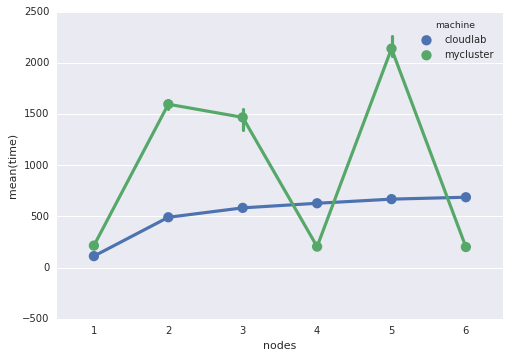

In [94]:
# 4k
sb_plot = sb.pointplot(x="nodes", y="time", hue="machine", data=dd)

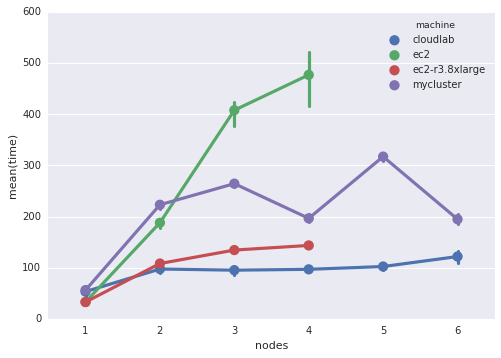

In [96]:
# 1M
sb_plot = sb.pointplot(x="nodes", y="time", hue="machine", data=dd)


In [117]:
sb_plot.get_figure().savefig('dd-multinode.png', bbox_inches='tight', dpi=300)

In [103]:
git = df[(df['workload'] == 'git') & (df['fs'] == 'gassyfs-udp') & (df[' cmd'].str.contains('make'))]

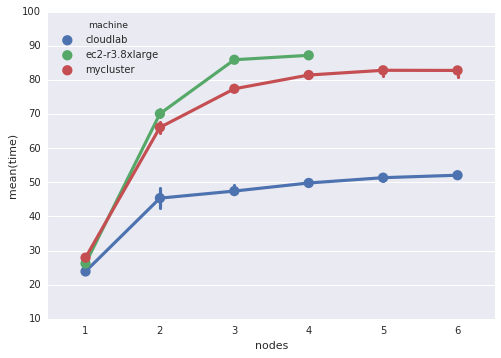

In [104]:
# 1M
sb_plot = sb.pointplot(x="nodes", y="time", hue="machine", data=git)


In [118]:
sb_plot.get_figure().savefig('git-multinode.png', bbox_inches='tight', dpi=300)

In [108]:
tmpfs = df[(df['workload'] == 'dd') & (df['fs'] == 'tmpfs') & (df[' cmd'].str.contains('1M'))]

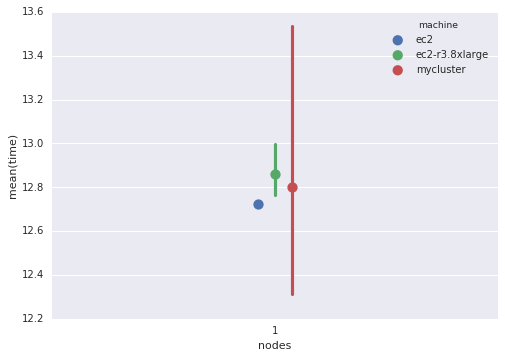

In [110]:
sb_plot = sb.pointplot(x="nodes", y="time", hue="machine", data=tmpfs, dodge=True)


In [111]:
tmpfs

,delta,cmd,machine,workload,nodes,fs,time
0,0:00:12.735413,"""dd if=/dev/zero of=./zero bs=1M count=30720""",ec2,dd,1,tmpfs,12.735413
2,0:00:12.716720,"""dd if=/dev/zero of=./zero bs=1M count=30720""",ec2,dd,1,tmpfs,12.716720
4,0:00:12.721076,"""dd if=/dev/zero of=./zero bs=1M count=30720""",ec2,dd,1,tmpfs,12.721076
0,0:00:12.997253,"""dd if=/dev/zero of=./zero bs=1M count=30720""",ec2-r3.8xlarge,dd,1,tmpfs,12.997253
2,0:00:12.766199,"""dd if=/dev/zero of=./zero bs=1M count=30720""",ec2-r3.8xlarge,dd,1,tmpfs,12.766199
4,0:00:12.813753,"""dd if=/dev/zero of=./zero bs=1M count=30720""",ec2-r3.8xlarge,dd,1,tmpfs,12.813753
0,0:00:12.553897,"""dd if=/dev/zero of=./zero bs=1M count=30720""",mycluster,dd,1,tmpfs,12.553897
4,0:00:12.313808,"""dd if=/dev/zero of=./zero bs=1M count=30720""",mycluster,dd,1,tmpfs,12.313808
8,0:00:13.534148,"""dd if=/dev/zero of=./zero bs=1M count=30720""",mycluster,dd,1,tmpfs,13.534148


In [115]:
foo = df[(df['workload'] == 'git') & (df['fs'] == 'tmpfs') & (df[' cmd'].str.contains('make'))]

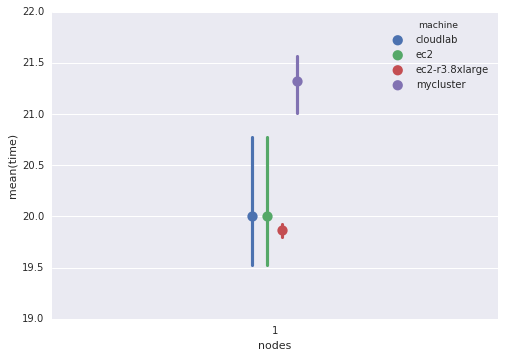

In [116]:
sb_plot = sb.pointplot(x="nodes", y="time", hue="machine", data=foo, dodge=True)
